# Data Mining (Bing News)

### Required Packages

In [1]:
#!pip install selenium
#!pip install beautfulsoup
#!pip install webdriver_manager
#!pip install pandas
#!pip install numpy
#!pip install matplotlib

In [2]:
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import re, csv
import time
from urllib.request import Request, urlopen
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Metadata for crawler

In [3]:
HEADERS = {
    "User-Agent":
    "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_6) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/13.0.5 Safari/605.1.15"
}

"""
Change the query to search for different keywords
"""
NEWS_URL = 'https://www.bing.com/news/search?q=omnicron+booster/'

### Crawler

In [4]:
def receive_html(url):
    """
    This function receives the html from the url, scrolls down the page and returns the html
    ----
    Parameters:
        url (string): The url to be scraped
    Returns:
        html (string): The html of the url
    """
    
    request = Request(url, headers=HEADERS)
    response = urlopen(request).read()

    driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
    driver.get(url)
    
    
    ## Scroll down to the end.
    
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    height = driver.execute_script("return document.body.scrollHeight")

    while True:
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(3)
        new_height = driver.execute_script("return document.body.scrollHeight")
        if new_height == height:     
            break
        height = new_height
        
    ## return html 

    return driver.page_source

def html_parser(html):
    """
    This function parses the html and extracts the title and url of the articles
    ----
    Parameters:
        html (string): The html of the url
    Returns:
        articles (list): The titles of the articles
    """
    
    soup = BeautifulSoup(html, "html.parser")
    soup.prettify()

    Titles = []
    
    for result in soup.select(".card-with-cluster"):
        """
        This loop extracts the title and url of the articles
        Modify the selectors to extract different information
        """
        title = result.select_one(".title").text
        Titles.append(title)
        
    print(len(Titles))
    
    return Titles

def save_results(articles):
    """
    This function saves the results in a csv file
    ----
    Parameters:
        articles (list): The titles of the articles
    """
    df = pd.DataFrame({'Title': articles})
    df.to_csv('data.csv')
        
def main():
    """
    This function calls the functions to scrape the data and save the results
    """
    html = receive_html(NEWS_URL)
    articles = html_parser(html)
    save_results(articles)

if __name__ == '__main__':
    main()



====== WebDriver manager ======
Current google-chrome version is 99.0.4844
Get LATEST chromedriver version for 99.0.4844 google-chrome
There is no [win32] chromedriver for browser  in cache
Trying to download new driver from https://chromedriver.storage.googleapis.com/99.0.4844.51/chromedriver_win32.zip
Driver has been saved in cache [C:\Users\vinee\.wdm\drivers\chromedriver\win32\99.0.4844.51]


158


### Visualization

In [5]:
df = pd.read_csv('data.csv')
df.drop("Unnamed: 0", axis=1, inplace=True)
df = df[:50]

In [6]:
side_effect = df.loc[df['Title'].str.contains('side effect', flags=re.IGNORECASE)]
omicron = df.loc[df['Title'].str.contains('Omicron', flags=re.IGNORECASE)]
booster = df.loc[df['Title'].str.contains('Booster', flags=re.IGNORECASE)]
vaccine = df.loc[df['Title'].str.contains('Vaccine', flags=re.IGNORECASE)]

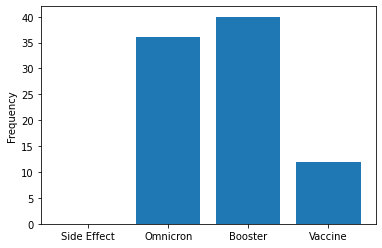

In [7]:
freq = np.array([len(side_effect), len(omicron), len(booster), len(vaccine)])

plt.bar(range(4), height=freq, tick_label=['Side Effect', 'Omnicron', 'Booster', 'Vaccine'])
plt.ylabel('Frequency')
plt.show()